<h1><center> Part 1: Exploratory Data Analysis </center></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import sklearn
import matplotlib.pyplot as plt
from array import array
from random import randrange
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict


df=pd.read_csv("spambase.csv")
df

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [2]:
feature_names=["word_freq_make:         continuous.","word_freq_address:      continuous.","word_freq_all:          continuous.","word_freq_3d:           continuous.",
"word_freq_our:          continuous.","word_freq_over:         continuous.","word_freq_remove:       continuous.","word_freq_internet:     continuous.",
"word_freq_order:        continuous.","word_freq_mail:         continuous.","word_freq_receive:      continuous.","word_freq_will:         continuous.",
"word_freq_people:       continuous.","word_freq_report:       continuous.","word_freq_addresses:    continuous.","word_freq_free:         continuous.",
"word_freq_business:     continuous.","word_freq_email:        continuous.","word_freq_you:          continuous.",
"word_freq_credit:       continuous.","word_freq_your:         continuous.",
"word_freq_font:         continuous.","word_freq_000:          continuous.",
"word_freq_money:        continuous.","word_freq_hp:           continuous.",
"word_freq_hpl:          continuous.","word_freq_george:       continuous.",
"word_freq_650:          continuous.","word_freq_lab:          continuous.",
"word_freq_labs:         continuous.","word_freq_telnet:       continuous.",
"word_freq_857:          continuous.","word_freq_data:         continuous.",
"word_freq_415:          continuous.","word_freq_85:           continuous.",
"word_freq_technology:   continuous.","word_freq_1999:         continuous.",
"word_freq_parts:        continuous.","word_freq_pm:           continuous.",
"word_freq_direct:       continuous.","word_freq_cs:           continuous.",
"word_freq_meeting:      continuous.","word_freq_original:     continuous.",
"word_freq_project:      continuous.","word_freq_re:           continuous.",
"word_freq_edu:          continuous.","word_freq_table:        continuous.",
"word_freq_conference:   continuous.","char_freq_;:            continuous.",
"char_freq_(:            continuous.","char_freq_[:            continuous.",
"char_freq_!:            continuous.","char_freq_$:            continuous.",
"char_freq_#:            continuous.","capital_run_length_average: continuous.",
"capital_run_length_longest: continuous.","capital_run_length_total:   continuous."]

for i in range(len(feature_names)):
    feature_names[i]=feature_names[i].replace("continuous.","")
    feature_names[i]=feature_names[i].rstrip()
    feature_names[i]=feature_names[i].replace(":","")
    
feature_names.append("target")
len(feature_names)

58

In [3]:
data=pd.read_csv("spambase.csv",names=feature_names)
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
data.shape

(4601, 58)

In [7]:
spam_count=ham_count=0
for i in range(len(data['target'])):
    if data['target'][i]==0:
        ham_count=ham_count+1
    else:
        spam_count=spam_count+1
print("Total hams:",ham_count)
print("Total spams:",spam_count)

Total hams: 2788
Total spams: 1813


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [9]:
data_corr=data.corr()

<AxesSubplot: >

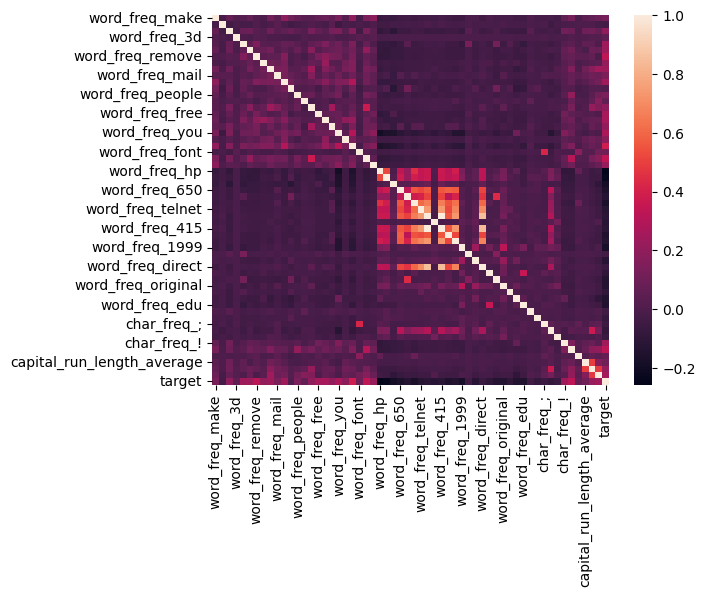

In [10]:
sns.heatmap(data = data_corr)

In [11]:
corr_target=data.corr()[['target']].sort_values(by="target",ascending=False)
corr_target

,target
target,1.000000
word_freq_your,0.383234
word_freq_000,0.334787
word_freq_remove,0.332117
char_freq_$,0.323629
word_freq_you,0.273651
word_freq_free,0.263215
word_freq_business,0.263204
capital_run_length_total,0.249164
word_freq_our,0.241920


<AxesSubplot: xlabel='target', ylabel='count'>

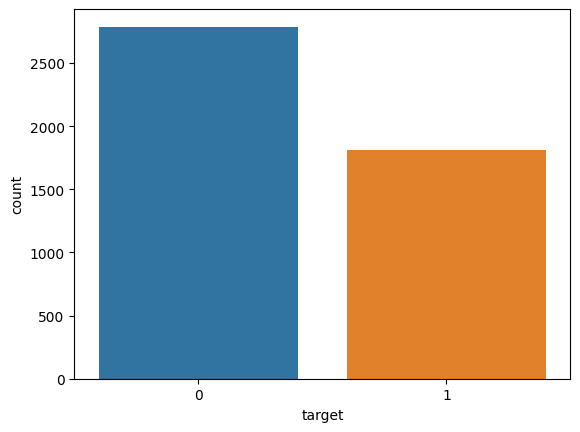

In [12]:
sns.countplot(x=data['target'])

In [13]:
data_target=data['target']
data_features=data.drop(['target'],axis=1)
print(data_target.shape)
print(data_features.shape)

(4601,)
(4601, 57)


In [14]:
X_train,X_test,y_train,y_test=train_test_split(data_features,data_target,test_size=0.2,random_state=0)
print("Training set of feature matrix:",X_train.shape)
print("Testing set of features matrix:",X_test.shape)
print("Training set of target vector:",y_train.shape)
print("Testing set of target vector:",y_test.shape)

Training set of feature matrix: (3680, 57)
Testing set of features matrix: (921, 57)
Training set of target vector: (3680,)
Testing set of target vector: (921,)


<h1><center> Part 2: Train the Gaussian NB model called gaussianNB_clf. </center></h1>

In [15]:
gaussianNB_clf=GaussianNB(var_smoothing=0.000000000000009)
gaussianNB_clf.fit(X_train,y_train)

GaussianNB(var_smoothing=9e-15)

<h1><center> Part 3: Analyze Model performance </center></h1>

In [16]:
preds=cross_val_predict(gaussianNB_clf,X_train,y_train,cv=3,method='predict_proba')

In [17]:
pred=[]
for i in preds:
    pred.append(i[1])
    
pred=np.asarray(pred)
pred

array([1.        , 1.        , 1.        , ..., 1.        , 0.        ,
       0.99999835])

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, pred)

In [19]:
g_mean=[]
for i in range(len(fpr)):
    g_mean.append((tpr[i]*(1-fpr[i])**0.5))
ind=np.argmax(g_mean)
print(f"The optimal threshold is {thresholds[ind]}")

The optimal threshold is 0.9999999988613713


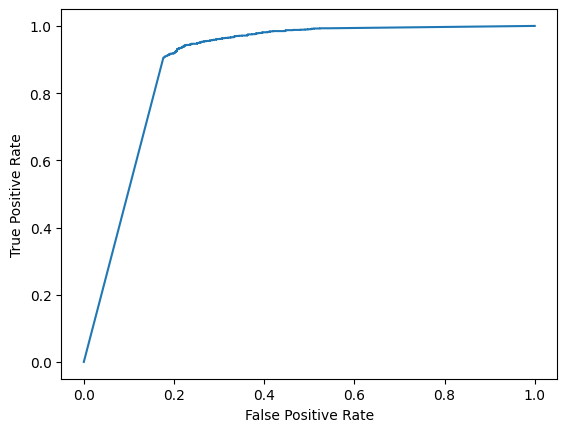

In [20]:
d=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
d.plot()

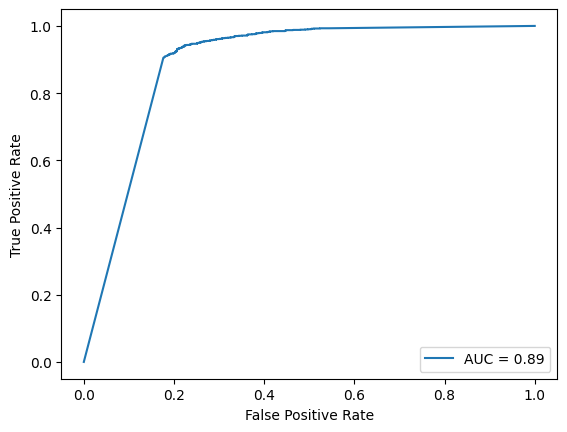

In [21]:
area=metrics.auc(fpr,tpr)
da=metrics.RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=area)
da.plot()

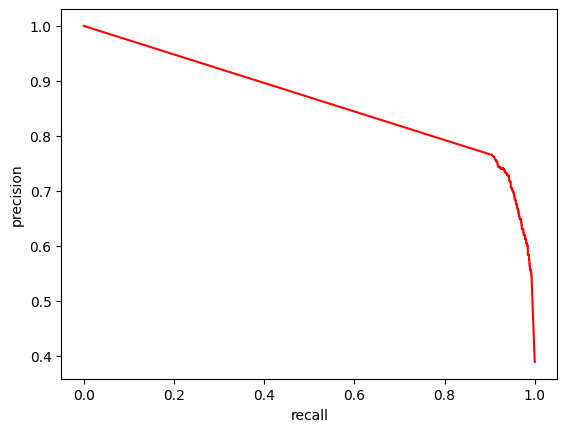

In [22]:
precision,recall,thresholds=metrics.precision_recall_curve(y_train, pred)

figs,graph=plt.subplots()
graph.plot(recall,precision,color="red")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

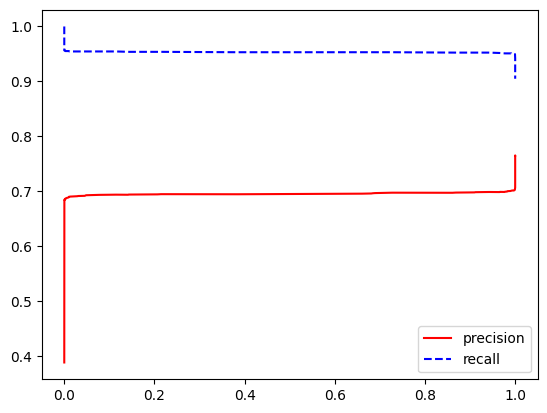

In [24]:
plt.plot(thresholds,precision[:-1],'r',thresholds,recall[:-1],'--b')
plt.legend(['precision','recall'])

<h1><center> Part 4: Evaluate the model on test data. </center></h1>

In [25]:
test_preds=gaussianNB_clf.predict_proba(X_test)
test_pred=[]
for i in test_preds:
    test_pred.append(i[1])
    
test_pred=np.asarray(test_pred)
test_pred

array([1.00000000e+000, 1.00000000e+000, 0.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 2.35471242e-262, 0.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 2.58497795e-086, 0.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       0.00000000e+000, 2.46364803e-044, 3.62456060e-083, 2.98832363e-263,
       0.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       0.00000000e+000, 1.00000000e+000, 0.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 2.42377162e-234,
       1.00000000e+000, 1.00000000e+000, 0.00000000e+000, 6.53788535e-016,
       1.00000000e+000, 1.08322708e-020, 0.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 5.82604279e-038, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1

In [26]:
for i in range(len(test_pred)):
    if test_pred[i]<=thresholds[ind]:
        test_pred[i]=0
    else:
        test_pred[i]=1
metrics.confusion_matrix(y_test,test_pred)

array([[264, 274],
       [  6, 377]], dtype=int64)

In [27]:
precision = metrics.precision_score(y_test,test_pred)
print(precision)

0.5791090629800307


In [28]:
recall = metrics.recall_score(y_test,test_pred)
print(recall)

0.9843342036553525


In [29]:
f_score=metrics.f1_score(y_test,test_pred)
print(f_score)

0.7292069632495165


<h1><center> Part 5: Written Report </center></h1>

The spambase dataset was imported from the UCI Library. While this dataset was already in a csv file, the feature names were in a seperate .names file. So, my approach was to open that file in notepad, then copy those names. Then they were attached to the main dataset. There are simpler ways to do this. But I learned them at a later stage. 

The dataset consists of 58 dimensions, including the target variable. There are a total of 4600 samples. Out of those, approximately 60% of data samples were ham and the rest were classified as spam.

The data was then later on split into training features and testing vector. These were split into training and testing sets, both of them. Here, the data was split into 80%-20% ratio. 

The Gaussian Naive Bayes model is first fit into the training data. Then afterwards, this model is processed with the cross validation function of sklearn, inside which we can change the number of folds. Furthermore, the method used to predict the resulting validation sets would be the predict_proba(), since we want the probability of the validation test point being spam or not. We could use predict(), but that gives us a definite class label as the output, either 0(ham) or 1(spam). And what we want are the probability estimates of the training set to see how it would perform in the test set.


With default value of var_smoothings, the model gives us a relatively good area under curve(auc), of roughly 0.94, however on running it on test set clearly indicates us that the model is overfitting. 


After multiple iterations with different values of cv's and var_smoothings, the best fit is the one with var_smoothing in the range of 7e-15 to 9e-15.

With default settings of the model, the model gives us a relatively good area under curve(auc), of roughly 94%, however on running it on test set clearly indicates us that the model is overfitting. So with the above mentioned var_smoothing's, the AUC would be 89%, but the f1 scores on the test set would be much better. Lower than or high than this range results in lesser f1 score and more imbalance between false negatives and false positives.

The another important fact to note here is that the data is imbalanced. So what is happening is that the model tends to overfit towards the ham cases(0). As a result, an extremely low degree of var_smoothing is required, since with less variance, calculations are stabilized.

Here we would definitely want to reduce the number of have more number of true positives and lesse false negatives. However, low false negative's also result in high number of false positive's(precision-recall tradeoff), and we don't want that either. Since, that would mean high number of ham emails that are classified as spam. One might have some important emails that would be classified as spam. So this is the aspect that we would want to avoid happening.

After the above configuration of the hyper parameter, we get the precision of 0.5791090629800307 and the recall of 0.9843342036553525. We would definitely want the precision to be higher, since it means a high number of emails that were classified as spam, but in fact were ham.
The f1-score is around 0.729.

The Naive Bayes algorithm holds the assumption that the features are independent of each other and are normally distributed. The features in the dataset seem to be conditionally independent, since not a lot of features have high correlation with each other. Which is to say that, a change in one feature doesn't necessarily affect another. Conditions like these, usually are ideal for Naive Bayes, but this poor performance might require further hyperparameter tuning and dimensionality-reduction. Hence, the Naive Bayes assumptions do hold on this dataset.